# Problem 3

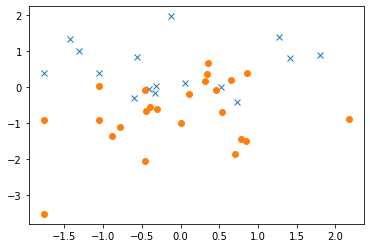

In [106]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [107]:
def update_a(a):
  a = a - eta*(K@a/(2*lam) - np.ones([len(a),1]))
  for i in range(len(a)):
    if a[i] >= 1:
      a[i]=1
    if a[i]<0:
      a[i]=0
  return a

In [108]:
def hinge_loss(w):
  loss = lam * w.T@w
  for i in range(n):
    loss += max(0, 1-y[i]*w.T@x[i])
  return loss

In [109]:
def w_hat(a):
  w = 0
  for i in range(n):
    w += a[i]*y[i]*x[i]
  w /= 2*lam
  return w

In [110]:
def make_gram_matrix(x,y):
  X = np.array([y,y]).T*x
  return X@X.T

In [111]:
def make_eta(mat):
  L = np.max(np.linalg.eig(2*mat)[0])
  return 1/L

In [112]:
def Lagrange_dual_func(a):
  return (-1/(4*lam)*a.T@K@a+sum(a)).squeeze().item()

In [113]:
a = np.zeros([n,1])
K = make_gram_matrix(x,y)
lam = 2
eta = make_eta(K)
num_iter = 200
lag_hist = []
loss_hist_hinge = []
for i in range(1, num_iter+1):
  a = update_a(a)
  w = w_hat(a)
  lag_hist.append(Lagrange_dual_func(a))
  loss_hist_hinge.append(hinge_loss(w))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'dual Lagrange')

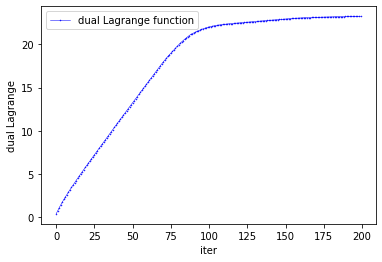

In [114]:
plt.plot(lag_hist, 'bo-', linewidth=0.5, markersize=0.5, label='dual Lagrange function')
plt.legend()
plt.xlabel('iter')
plt.ylabel('dual Lagrange')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'loss')

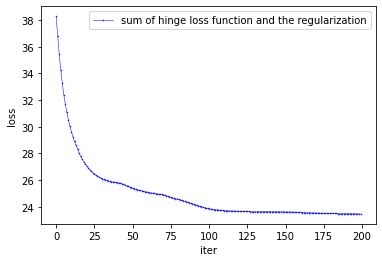

In [115]:
plt.plot(loss_hist_hinge, 'bo-', linewidth=0.5, markersize=0.5, label='sum of hinge loss function and the regularization')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')

Text(0, 0.5, 'gap')

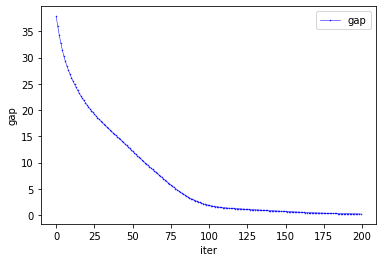

In [116]:
gap = []
for i in range(num_iter):
  gap.append(abs(loss_hist_hinge[i]-lag_hist[i]))
plt.plot(gap, 'bo-', linewidth=0.5, markersize=0.5, label='gap')
plt.legend()
plt.xlabel('iter')
plt.ylabel('gap')